In [ ]:
# connecting colab to drive
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing required libraries
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
# path of our data
data_train = '/content/drive/MyDrive/split_train_test_val/train'
data_test = '/content/drive/MyDrive/split_train_test_val/test'
data_val = '/content/drive/MyDrive/split_train_test_val/val'

In [ ]:
# making data to same size and shape
# data augmentation
trdata = ImageDataGenerator(rescale=1./255)
train_data = trdata.flow_from_directory(data_train,target_size=(224,224),class_mode='sparse',batch_size=10)
valdata = ImageDataGenerator(rescale=1./255)
val_data = valdata.flow_from_directory(data_val, target_size=(224,224),class_mode='sparse',batch_size=10)
testdata = ImageDataGenerator(rescale=1./255)
test_data = testdata.flow_from_directory(data_test, target_size=(224,224),class_mode='sparse',batch_size=10)

Found 175 images belonging to 5 classes.
Found 35 images belonging to 5 classes.
Found 40 images belonging to 5 classes.


In [ ]:
# creating our VGG16 model from scretch
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu",kernel_regularizer=keras.regularizers.l2(0.001))) #kernel_regularizer=keras.regularizers.l2(0.001)
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


In [ ]:
# Adam optimizer to learn our data clearly
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.00005)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# compile our model
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

In [ ]:
# Model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_79 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_80 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_81 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [ ]:
# Train our model
hist = model.fit(train_data, validation_data= val_data,epochs=20)

Epoch 1/20
18/18 [==============================] - 5s 229ms/step - loss: 1.7324 - accuracy: 0.1829 - val_loss: 1.5673 - val_accuracy: 0.2857
Epoch 2/20
18/18 [==============================] - 5s 291ms/step - loss: 1.5188 - accuracy: 0.3143 - val_loss: 1.3319 - val_accuracy: 0.4000
Epoch 3/20
18/18 [==============================] - 5s 288ms/step - loss: 1.3887 - accuracy: 0.4171 - val_loss: 1.2765 - val_accuracy: 0.5143
Epoch 4/20
18/18 [==============================] - 4s 211ms/step - loss: 1.2453 - accuracy: 0.4629 - val_loss: 1.0195 - val_accuracy: 0.7143
Epoch 5/20
18/18 [==============================] - 4s 212ms/step - loss: 1.1391 - accuracy: 0.5257 - val_loss: 1.4261 - val_accuracy: 0.5143
Epoch 6/20
18/18 [==============================] - 4s 214ms/step - loss: 1.2192 - accuracy: 0.5486 - val_loss: 0.9941 - val_accuracy: 0.6000
Epoch 7/20
18/18 [==============================] - 4s 213ms/step - loss: 0.9586 - accuracy: 0.6229 - val_loss: 0.9278 - val_accuracy: 0.6286
Epoch 

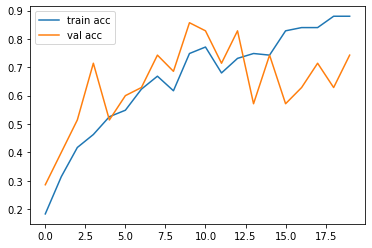

In [ ]:
# ploting our train and validation accuracy

plt.plot(hist.history['accuracy'], label='train acc')

plt.plot(hist.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()

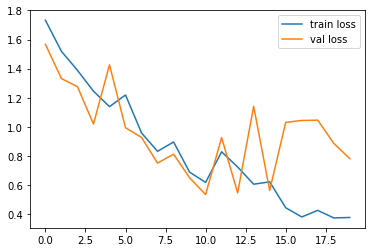

In [ ]:
# ploting our train and validation losses
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [ ]:
# evaluating our model
model.evaluate(test_data,batch_size=10)       

4/4 [==============================] - 0s 69ms/step - loss: 0.9584 - accuracy: 0.7500


[0.9584042429924011, 0.75]

In [ ]:
# model prediction
Y_pred = model.predict_generator(test_data)
y_pred = np.argmax(Y_pred,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
# import metrics for confusion matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
confusion_matrix(test_data.classes,y_pred)

array([[3, 0, 0, 2, 3],
       [3, 2, 0, 2, 1],
       [1, 1, 2, 1, 3],
       [2, 1, 0, 3, 2],
       [1, 3, 3, 1, 0]])

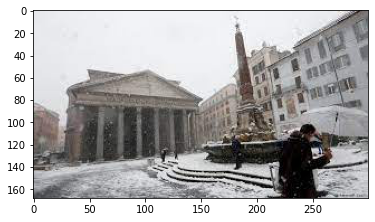

In [ ]:
# showing the unseen image for checking the prediction
img = plt.imread('/content/drive/MyDrive/split_train_test_val/test/Snowy/download (10).jpg')
plt.imshow(img)
plt.show()

In [ ]:
# resize image
weather_img = cv2.resize(img,(224,224))

In [ ]:
# preprocess image
x = keras.preprocessing.image.array_to_img(weather_img)
x = np.expand_dims(x,axis=0)

In [ ]:
# predicting the image
model.predict(x)

array([[3.9041038e-03, 6.3749641e-05, 1.5602750e-02, 9.8042566e-01,
        3.8120288e-06]], dtype=float32)

In [ ]:
whether = ['Cloudy','Foggy','Rainy','Snowy','Sunny']
predicted = whether[np.argmax(model.predict(x)[0])]

In [ ]:
# final output
predicted

'Snowy'